# Programação para Sensoriamento Remoto
<hr style="border:2px solid #0077b9;">

- Professores:
  - Gilberto Ribeiro de Queiroz
  - Thales Sehn Körting
  - Eugênio Almeida
- Colaboradoes:
  - Vitor Gomes

## Objetivo
<hr style="border:2px solid #0077b9;">

Utilizar as bibliotecas Pandas, GeoPandas, Matplotlib e Seaborn para realizar análise exploratória de dados.

Para cumprir nosso objetivo iremos utilizar os dados de focos de queimadas para o Estado do Tocantins do ano de 2016.

##  Pandas e GeoPandas: análise de dados em Python
<hr style="border:2px solid #0077b9;">

<table>
<tr>
<td><img src="http://pandas.pydata.org/_static/pandas_logo.png" alt="Python Data Analysis Library" style="height: 100px;"/></td>
</tr>
<tr>
<td><img src="http://geopandas.org/_images/world_gdp_per_cap_red.png" alt="Python Data Analysis Library" style="height: 300px;"/></td>
</tr>
</table>

### Pandas

Fornece duas estruturas de dados básicas: `Series` e `DataFrame`. Para estas estruturas, existem diversas operações de alto nível disponíveis, tais como: agregação de valores e visualização básica através da matplotlib.

Um objeto do tipo `Series` representa um vetor (ou array unidimensional) capaz de armazenar qualquer tipo de dado, como números inteiros, strings ou objetos como data e hora. Possui um eixo (*axis*) usado para rotular cada valor do vetor. Esses rótulos funcionam com um índice para os valores da série.

<table>
  <caption style="font-size: 20px;text-align: center">Series</caption>
  <tbody>
    <tr>
      <td style="font-weight: bold;text-align: center"></td>
      <td style="font-weight: bold;text-align: center">municipio</td>    
    </tr>
    <tr>
      <td style="text-align: center">0</td>
      <td style="text-align: left">Sítio Novo Do Tocantins</td>
    </tr>
    <tr>
      <td style="text-align: center">1</td>
      <td style="text-align: left">Ouro Preto</td>
    </tr>
    <tr>
      <td style="text-align: center">2</td>
      <td style="text-align: left">Mariana</td>
    </tr>
    <tr>
      <td style="text-align: center">3</td>
      <td style="text-align: left">Araxá</td>
    </tr>
    <tr>
      <td style="text-align: center">4</td>
      <td style="text-align: left">Belo Horizonte</td>
    </tr>
  </tbody>
</table>

### Pandas

Um objeto do tipo `DataFrame` representa um tabela bidimensional com os eixos rotulados (linhas e colunas).

<table>
  <caption style="font-size: 20px;text-align: center">DataFrame</caption>
  <tbody>
    <tr>
      <td style="font-weight: bold;text-align: center"></td>
      <td style="font-weight: bold;text-align: center">municipio</td>    
      <td style="font-weight: bold;text-align: center">estado</td>
      <td style="font-weight: bold;text-align: center">regiao</td>
      <td style="font-weight: bold;text-align: center">pais</td>
      <td style="font-weight: bold;text-align: center">satelite</td>
      <td style="font-weight: bold;text-align: center">bioma</td>
      <td style="font-weight: bold;text-align: center">timestamp</td>
      <td style="font-weight: bold;text-align: center">satelite_r</td>
    </tr>
    <tr>
      <td style="text-align: center">0</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/02/12 17:05:45</td>
      <td style="text-align: center">f</td>
    </tr>
    <tr>
      <td style="text-align: center">1</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/07/17 04:00:00</td>
      <td style="text-align: center">f</td>
    </tr>
    <tr>
      <td style="text-align: center">2</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">AQUA_M-T</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/01/15 16:40:14</td>
      <td style="text-align: center">t</td>
    </tr>
    <tr>
      <td style="text-align: center">3</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/07/17 04:00:00</td>
      <td style="text-align: center">f</td>
    </tr>
    <tr>
      <td style="text-align: center">4</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/02/12 17:05:45</td>
      <td style="text-align: center">f</td>
    </tr>
  </tbody>
</table>

### GeoPandas

Possui facilidades para tratar colunas com dados geométricos, incluindo visualização.

As duas estruturas fornecidas são:
- `GeoSeries`: um vetor contendo uma representação geométrica em conformidade com os tipos da *OGC Simple Feature*: `Point`, `LineString`, `Polygon`, `MultiPoint`, `MultiLineString`, `MultiPolygon`. Essa estrutura possui as mesmas operações da classe `Series` do Pandas além de operações espaciais como cálculo de área, perímetro, distâncias, entre outras.

<table>
  <caption style="font-size: 20px;text-align: center">GeoSeries</caption>
  <tbody>
    <tr>
      <td style="font-weight: bold;text-align: center"></td>
      <td style="font-weight: bold;text-align: center">municipio</td>    
    </tr>
    <tr>
      <td style="text-align: center">0</td>
      <td style="text-align: left">POINT (-47.607 -5.673)</td>
    </tr>
    <tr>
      <td style="text-align: center">1</td>
      <td style="text-align: left">POINT (-47.606 -5.581)</td>
    </tr>
    <tr>
      <td style="text-align: center">2</td>
      <td style="text-align: left">POINT (-47.734 -5.562)</td>
    </tr>
    <tr>
      <td style="text-align: center">3</td>
      <td style="text-align: left">POINT (-47.605 -5.58)</td>
    </tr>
    <tr>
      <td style="text-align: center">4</td>
      <td style="text-align: left">POINT (-47.606 -5.677)</td>
    </tr>
  </tbody>
</table>

### GeoPandas

- `GeoDataFrame`: tabela com uma coluna geométrica.

<table>
  <caption style="font-size: 20px;text-align: center">GeoDataFrame</caption>
  <tbody>
    <tr>
      <td style="font-weight: bold;text-align: center"></td>
      <td style="font-weight: bold;text-align: center">municipio</td>    
      <td style="font-weight: bold;text-align: center">estado</td>
      <td style="font-weight: bold;text-align: center">regiao</td>
      <td style="font-weight: bold;text-align: center">pais</td>
      <td style="font-weight: bold;text-align: center">satelite</td>
      <td style="font-weight: bold;text-align: center">bioma</td>
      <td style="font-weight: bold;text-align: center">timestamp</td>
      <td style="font-weight: bold;text-align: center">satelite_r</td>
      <td style="font-weight: bold;text-align: center">geometry</td>
    </tr>
    <tr>
      <td style="text-align: center">0</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/02/12 17:05:45</td>
      <td style="text-align: center">f</td>
      <td style="text-align: left">POINT (-47.607 -5.673)</td>
    </tr>
    <tr>
      <td style="text-align: center">1</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/07/17 04:00:00</td>
      <td style="text-align: center">f</td>
      <td style="text-align: left">POINT (-47.606 -5.581)</td>
    </tr>
    <tr>
      <td style="text-align: center">2</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">AQUA_M-T</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/01/15 16:40:14</td>
      <td style="text-align: center">t</td>
      <td style="text-align: left">POINT (-47.734 -5.562)</td>
    </tr>
    <tr>
      <td style="text-align: center">3</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/07/17 04:00:00</td>
      <td style="text-align: center">f</td>
      <td style="text-align: left">POINT (-47.605 -5.58)</td>
    </tr>
    <tr>
      <td style="text-align: center">4</td>
      <td style="text-align: center">Sítio Novo Do Tocantins</td>
      <td style="text-align: center">Tocantins</td>
      <td style="text-align: center">N</td>
      <td style="text-align: center">Brazil</td>
      <td style="text-align: center">NPP_375</td>
      <td style="text-align: center">Cerrado</td>
      <td style="text-align: center">2016/02/12 17:05:45</td>
      <td style="text-align: center">f</td>
      <td style="text-align: left">POINT (-47.606 -5.677)</td>
    </tr>
  </tbody>
</table>

## Matplotlib e Seaborn: visualização de dados em Python
<hr style="border:2px solid #0077b9;">

<table>

<tr>

<td><img src="https://matplotlib.org/_static/logo2.svg" alt="Matplotlib is a library for making 2D plots of arrays in Python" style="height: 100px;"/><br><img src="https://matplotlib.org/_images/sphx_glr_subplot_demo_001.png" alt="Matplotlib is a library for making 2D plots of arrays in Python" style="height: 200px;"/></td>

<td><h1>seaborn: statistical data visualization</h1><br><img src="https://seaborn.pydata.org/_images/structured_heatmap.png" alt="seaborn: statistical data visualization" style="height: 300px;"/></td>

</tr>

</table>

## Dados de Entrada
<hr style="border:2px solid #0077b9;">

<table style="font-size: 20px;">
<caption style="text-align: center; font-size: 20px;">Arquivo ESRI Shapefile contendo os focos de queimadas do ano de 2016<br>(somente do satéllite de referência).</caption>
<tr>
  <td>
    <img src="../img/focos-2016.png" alt="Focos Brasil no ano de 2016" style="height: 400px;" align="middle"/>
  </td>
<!--  <td>
    <table>
      <caption>Sensores/Satélites</caption>
      <tbody>
      <tr>
        <td style="text-align: left">AQUA_M-M</td>
        <td style="text-align: left">NOAA-15</td>    
        <td style="text-align: left">NOAA-19D</td>
      </tr>
      <tr>
        <td style="text-align: left">AQUA_M-T</td>
        <td style="text-align: left">NOAA-15D</td>    
        <td style="text-align: left">NPP</td>  
      </tr>
      <tr>
        <td style="text-align: left">GOES-13`</td>
        <td style="text-align: left">NOAA-18</td>
        <td style="text-align: left">NPP_375</td> 
      </tr>
      <tr>
        <td style="text-align: left">METOP-B</td>    
        <td style="text-align: left">NOAA-18D</td>
        <td style="text-align: left">TERRA_M-M</td> 
      </tr>
      <tr>
        <td style="text-align: left">MSG-03</td>    
        <td style="text-align: left">NOAA-19</td>
        <td style="text-align: left">TERRA_M-T</td>  
      </tr>
      </tbody>
    </table>
  </td>-->
</tr>
</table>

## Dados de Entrada
<hr style="border:2px solid #0077b9;">

<table style="font-size: 20px;">
  <caption>Arquivo ESRI Shapefile contendo os municípios brasileiros (Fonte: IBGE).</caption>
  <tr>
    <td><img src="../img/municipios.png" alt="Mapa de Municípios - IBGE" style="height: 400px;"/></td>
  </tr>
</table>

## Configurações Iniciais do Script
<hr style="border:2px solid #0077b9;">

No Python 2.7, precisamos notificar o interpretador para que ele aceite caracteres em utf-8 (ou outra codificação desejada):

In [142]:
# encoding: utf-8

Para que o *notebook IPython* coloque as figuras geradas pela matplotlib *inline*:

In [143]:
%matplotlib inline

Vamos importar as bibliotecas `pandas`, `geopandas` e `matplotlib` para podermos manipular os dados com focos de queimada usando um `GeoDataFrame`:

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Explorando os Focos de Queimadas
<hr style="border:2px solid #0077b9;">


Abrir o shapefile e transformá-lo em um `GeoDataFrame`:

In [144]:
focos = gpd.read_file("/home/gribeiro/Dados/Queimadas/focos/focos-2016-satelite-referencia.shp")

Vamos ver uma amostra dos dados:

In [146]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,45465784.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016/07/17 17:28:09.000,t,0.336125,POINT (-50.327 -23.311)
1,45465873.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016/07/11 16:28:03.000,t,0.904505,POINT (-50.323 -23.348)
2,45465920.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016/08/29 17:10:00.000,t,0.892502,POINT (-48.923 -24.772)
3,45465927.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016/08/06 17:04:37.000,t,0.348351,POINT (-48.994 -24.816)
4,45465931.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016/08/06 17:04:37.000,t,0.485248,POINT (-48.993 -24.825)


Podemos descobrir os tipos de dados das colunas do `GeoDataFrame` através do atributo `dtypes`: 

In [147]:
focos.dtypes

id            float64
municipio      object
estado         object
regiao         object
pais           object
satelite       object
bioma          object
timestamp      object
satelite_r     object
rand          float64
geometry       object
dtype: object

**V1:** Visualizar os focos de queimada em um mapa.

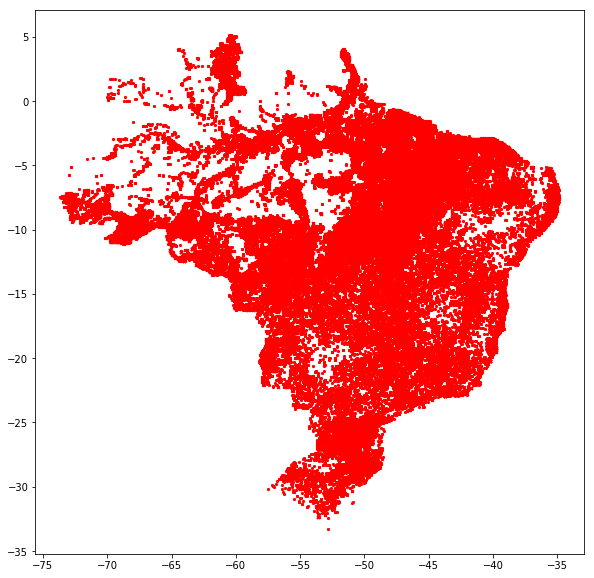

In [148]:
focos.plot(marker='x', color='red', markersize=5, figsize=(20, 10));

**T1:** Alterar o formato da coluna `timestamp` para o tipo `datetime` para facilitar a manipulação dos dados desta coluna:

In [149]:
focos["timestamp"] = pd.to_datetime(focos["timestamp"])

In [150]:
focos.dtypes

id                   float64
municipio             object
estado                object
regiao                object
pais                  object
satelite              object
bioma                 object
timestamp     datetime64[ns]
satelite_r            object
rand                 float64
geometry              object
dtype: object

In [151]:
focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry
0,45465784.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-07-17 17:28:09,t,0.336125,POINT (-50.327 -23.311)
1,45465873.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-07-11 16:28:03,t,0.904505,POINT (-50.323 -23.348)
2,45465920.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-29 17:10:00,t,0.892502,POINT (-48.923 -24.772)
3,45465927.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-06 17:04:37,t,0.348351,POINT (-48.994 -24.816)
4,45465931.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-06 17:04:37,t,0.485248,POINT (-48.993 -24.825)


**V2:** Visualizar os focos de queimada do estado de Minas Gerais:

Podemos selecionar da tabela focos apenas as linhas contendo os focos de Minas Gerais:

In [152]:
focos_mg = focos[focos.estado == 'Minas Gerais']

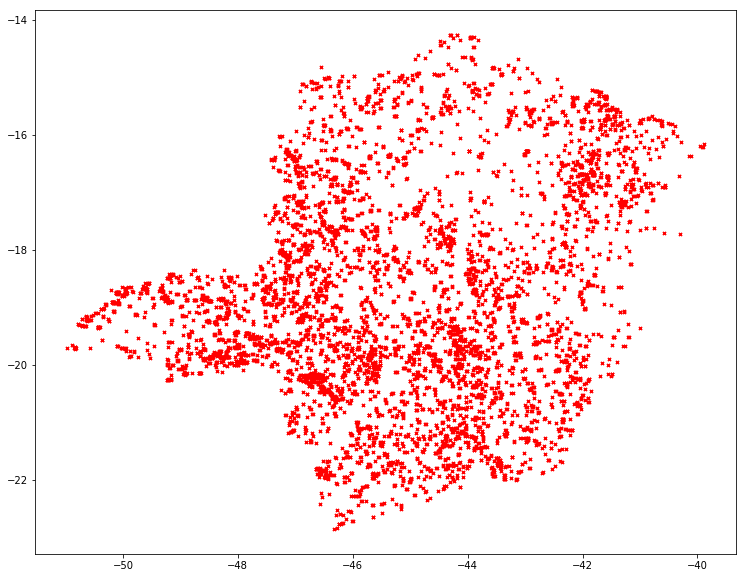

In [153]:
focos_mg.plot(marker='x', color='red', markersize=10, figsize=(20, 10));

**V3:** Visualizar os focos de queimada do estado de Minas Gerais no mês de novembro:

In [154]:
focos_mg_nov = focos_mg[focos.timestamp.dt.month == 11]

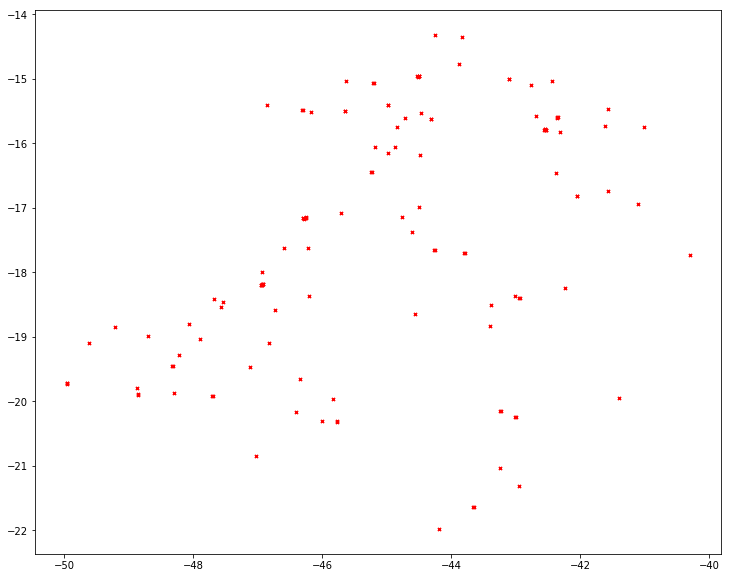

In [155]:
focos_mg_nov.plot(marker='x', color='red', markersize=10, figsize=(20, 10));

**Q1:** Qual a distribuição dos focos ao longo dos meses do ano em 2016?

Para responder esta pergunta podemos utilizar o operador de agregação (sumarização) `groupby`, disponível em um `DataFrame`.  

Neste caso, precisaremos informar:
* O critério da agregação: a parte contendo o número do mês na coluna com a data e hora da detecção do foco (coluna `timestamp`).
* Utilizar uma das colunas para realizar a contagem através do operador `count`.

In [156]:
focos_mes = focos.groupby(focos.timestamp.dt.month).estado.count()

O objeto `focos_mes` retornado na operação acima corresponderá um `pandas.core.series.Series`:

In [157]:
type(focos_mes)

pandas.core.series.Series

In [159]:
focos_mes

timestamp
1      5982
2      4148
3      3797
4      3977
5      3570
6      6340
7     19143
8     38211
9     44062
10    30222
11    20169
12     8724
Name: estado, dtype: int64

Na saída acima podemos notar o seguinte:
* O nome da série é `estado`, por conta da coluna usada para realizar a contagem.
* Os índices da série correspondem aos índices numéricos dos meses do ano.

Podemos re-indexar a série pelo nome do mês do ano. Para isso, podemos construir uma função lambda e aplicá-la através do operador `map` a cada um dos valores numéricos do índice do ano. Para transformar o mês do ano em um nome, utilizaremos o módulo `calendar` da Biblioteca Padrão Python.

In [160]:
import calendar

novo_indice = map(lambda v : calendar.month_abbr[v], focos_mes.index)

In [161]:
novo_indice

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Agora podemos construir explicitamente a nova série através do construtor `pd.Series`:

In [162]:
focos_mes = pd.Series(data=focos_mes.values, index=novo_indice)

In [163]:
type(focos_mes)

pandas.core.series.Series

Podemos também ajustar o nome da série e o rótulo do índice:

In [164]:
focos_mes.name= "Número Focos/Mês"

focos_mes.index.name="mes"

In [165]:
focos_mes

mes
Jan     5982
Feb     4148
Mar     3797
Apr     3977
May     3570
Jun     6340
Jul    19143
Aug    38211
Sep    44062
Oct    30222
Nov    20169
Dec     8724
Name: Número Focos/Mês, dtype: int64

Podemos apresentar um gráfico de barras com o total de focos por mês:

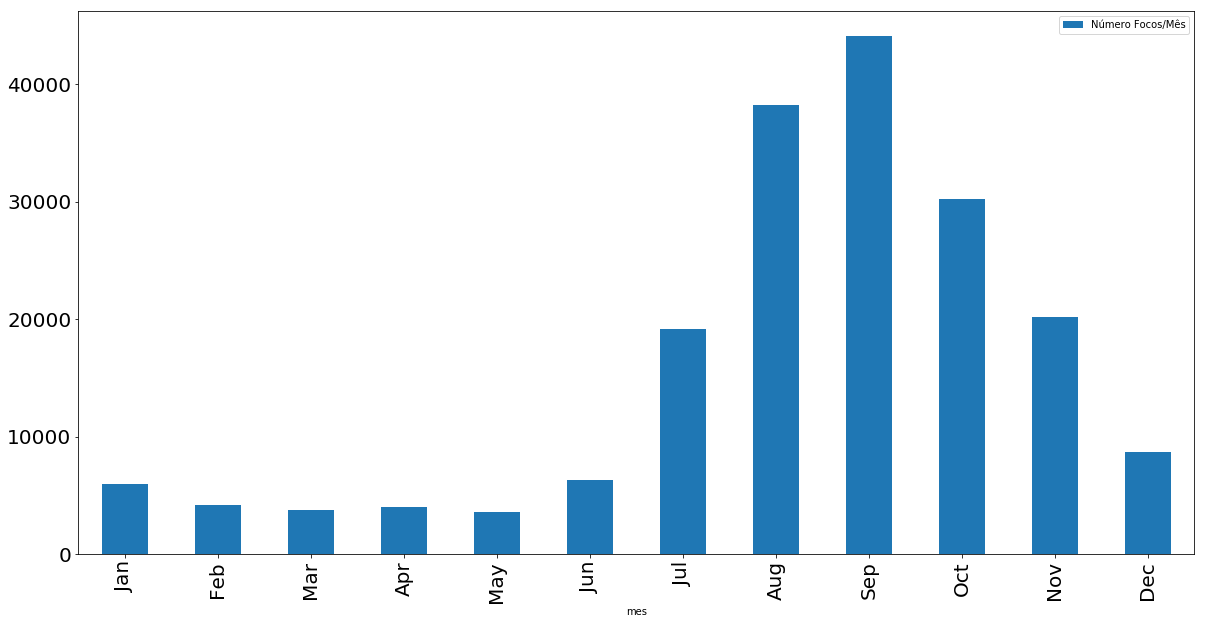

In [166]:
focos_mes.plot.bar(legend=True, fontsize=20, figsize=(20,10));

Podemos melhorar nosso gráfico controlando as diversas opções de plotagem fornecidas pela Matplotlib:

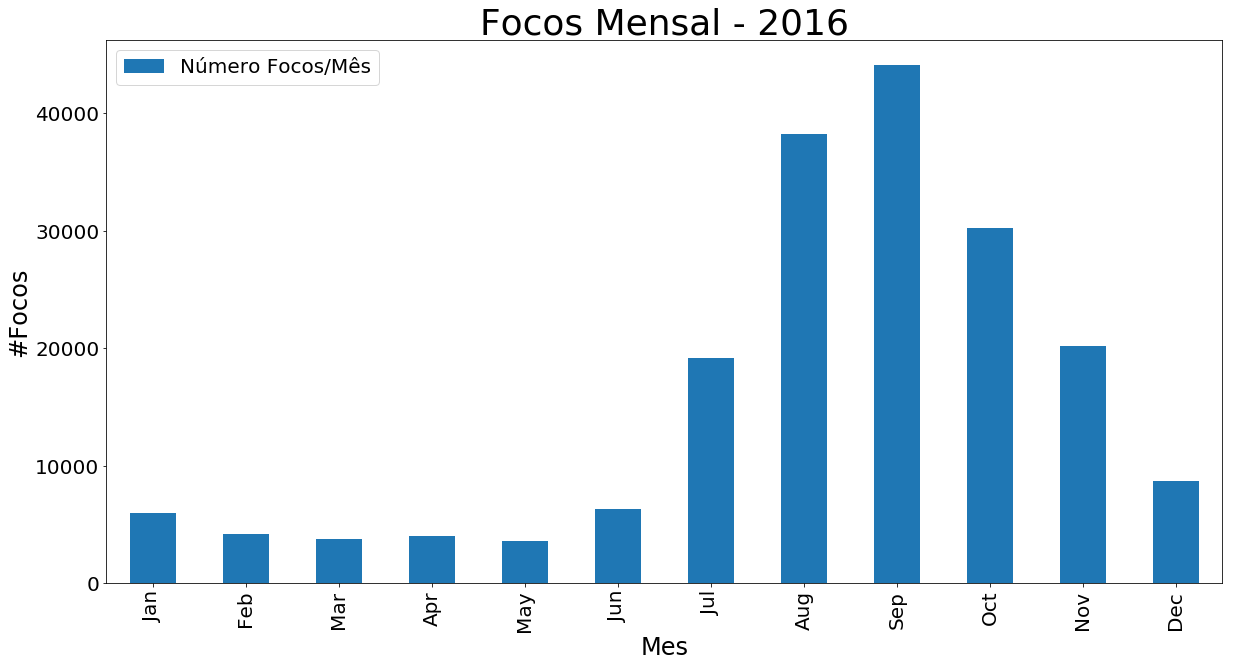

In [167]:
ax  = focos_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Focos Mensal - 2016", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Focos", fontsize=24);
ax.legend(loc=2, prop={'size': 20});

Podemos salvar a figura do gráfico gerado:

In [168]:
ax.figure.savefig("/home/gribeiro/Dados/Queimadas/focos/chart-focos-mes-2016.png",
                  dpi=100, format="png")

**Q2:** Qual a distribuição dos focos no ano de 2016 por bioma?

In [169]:
focos_bioma = focos.groupby("bioma").bioma.count()

Novamente teremos uma série de dados Pandas:

In [170]:
type(focos_bioma)

pandas.core.series.Series

Podemos acertar o nome da série e do índice:

In [171]:
focos_bioma.index.name = "Biomas"
focos_bioma.name = "Numero Focos por Bioma"

focos_bioma

Biomas
Amazônia          89117
Caatinga          14059
Cerrado           60554
Mata Atlântica    17664
Pampa              1263
Pantanal           5688
Name: Numero Focos por Bioma, dtype: int64

Podemos agora desenhar um gráfico circular:

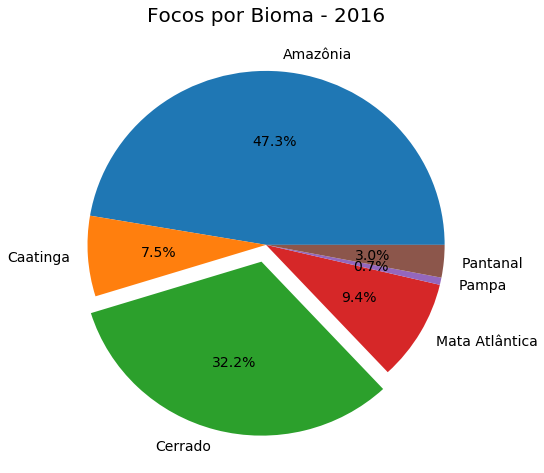

In [172]:
explode=[0.0, 0.0, 0.1, 0.0, 0.0, 0.0]
ax = focos_bioma.plot(kind="pie", explode=explode, autopct='%1.1f%%', figsize=(8,8), fontsize="14");
ax.set_title("Focos por Bioma - 2016", fontsize=20);
ax.set_ylabel("");

**Q3:** Qual a frequência mensal de queimadas por bioma?

Vamos adicionar uma nova coluna chamada `mes` no `GeoDataFrame` `focos`  para facilitar o processamento:

In [173]:
focos["mes"] = focos["timestamp"].dt.month

focos.head()

,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,geometry,mes
0,45465784.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-07-17 17:28:09,t,0.336125,POINT (-50.327 -23.311),7
1,45465873.0,Abatiá,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-07-11 16:28:03,t,0.904505,POINT (-50.323 -23.348),7
2,45465920.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-29 17:10:00,t,0.892502,POINT (-48.923 -24.772),8
3,45465927.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-06 17:04:37,t,0.348351,POINT (-48.994 -24.816),8
4,45465931.0,Adrianópolis,Paraná,S,Brazil,AQUA_M-T,Mata Atlântica,2016-08-06 17:04:37,t,0.485248,POINT (-48.993 -24.825),8


Vamos apresentar as informações em uma `pivot_table`:

In [174]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
bioma,,,,,,,,,,,,,
Amazônia,4473.0,1844.0,2069.0,1410.0,1034.0,1726.0,6067.0,17736.0,21345.0,13412.0,12480.0,5521.0,89117.0
Caatinga,264.0,134.0,74.0,97.0,89.0,187.0,589.0,1473.0,2249.0,4512.0,2838.0,1553.0,14059.0
Cerrado,511.0,1460.0,994.0,1606.0,1910.0,3325.0,8878.0,13501.0,13944.0,9694.0,3752.0,979.0,60554.0
Mata Atlântica,650.0,625.0,610.0,801.0,450.0,869.0,2859.0,4009.0,4183.0,1323.0,815.0,470.0,17664.0
Pampa,42.0,38.0,22.0,25.0,32.0,146.0,196.0,339.0,254.0,65.0,42.0,62.0,1263.0
Pantanal,42.0,47.0,28.0,38.0,55.0,87.0,554.0,1153.0,2087.0,1216.0,242.0,139.0,5688.0
All,5982.0,4148.0,3797.0,3977.0,3570.0,6340.0,19143.0,38211.0,44062.0,30222.0,20169.0,8724.0,188345.0


Vamos remover a totalização nas linhas e colunas para obter uma estatística descritiva:

In [ ]:
pvt = pd.pivot_table(focos, values="id", index=["bioma"],
                     columns=["mes"], aggfunc="count",
                     fill_value=0)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

pvt

In [ ]:
pvt.describe()

**Q4:** apresentar uma tabela com a quantidade de focos por município ao longo dos meses.

In [175]:
pvt = pd.pivot_table(focos, values="id", index=["estado", "municipio"], columns=["mes"], aggfunc="count", fill_value=0, margins=True)

pvt.columns=['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez', 'total']

pvt.head()

jan  fev  mar  abr  mai  jun   jul   ago    set   out  \
estado municipio                                                             
Acre   Acrelândia    0.0  0.0  0.0  0.0  0.0  4.0  22.0  64.0   88.0   5.0   
       Assis Brasil  1.0  0.0  0.0  0.0  2.0  1.0   3.0  29.0  143.0  56.0   
       Brasiléia     2.0  0.0  0.0  0.0  1.0  8.0  21.0  61.0  380.0  87.0   
       Bujari        1.0  0.0  0.0  0.0  4.0  4.0  27.0  55.0  114.0  17.0   
       Capixaba      0.0  0.0  0.0  0.0  0.0  0.0   9.0  82.0   66.0  42.0   

                     nov  dez  total  
estado municipio                      
Acre   Acrelândia    1.0  1.0  185.0  
       Assis Brasil  0.0  0.0  235.0  
       Brasiléia     4.0  2.0  566.0  
       Bujari        3.0  0.0  225.0  
       Capixaba      2.0  0.0  201.0

**Q5:** Quais os municípios do **"top 5"**?

In [176]:
top5 = pvt["total"].sort_values(ascending=False).iloc[1:6]
top5

estado              municipio        
Mato Grosso do Sul  Corumbá              4019.0
Rondônia            Porto Velho          3652.0
Mato Grosso         Colniza              1999.0
Tocantins           Lagoa Da Confusão    1892.0
Pará                Altamira             1872.0
Name: total, dtype: float64

Outra forma de obter o "top5" seria:

In [177]:
top5 = focos.groupby(["estado", "municipio"]).municipio.count().sort_values(ascending=False)[0:5]
top5

estado              municipio        
Mato Grosso do Sul  Corumbá              4019
Rondônia            Porto Velho          3652
Mato Grosso         Colniza              1999
Tocantins           Lagoa Da Confusão    1892
Pará                Altamira             1872
Name: municipio, dtype: int64

**V4.** Abrir o mapa de municípios brasileiros e fazer uma visualização.

In [178]:
municipios = gpd.read_file("/home/gribeiro/Dropbox/Dados/IBGE/organizacao territorial/BRMUE250GC_SIR.shp")

municipios.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


Alterar o nome das colunas da camada de municípios para facilitar nosso trabalho:

In [179]:
municipios.columns = ["nome", "cod_ibge", "geometry"]

municipios.head()

,nome,cod_ibge,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


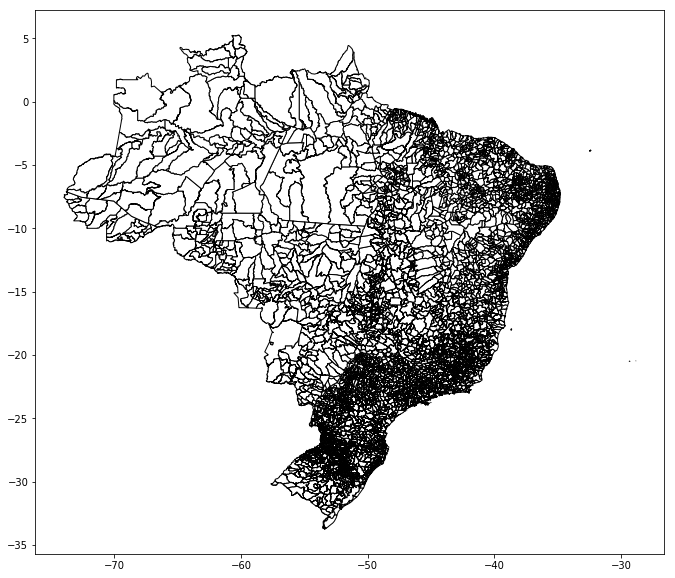

In [180]:
municipios.plot(color='white', edgecolor='black', figsize=(20, 10));

**V5:** Municípios de MG.

**Obs.:** Os dois primeiro dígitos do código do IBGE para os municípios de Minas Gerais na coluna `cod_ibge` é `31`.

In [181]:
munic_mg = municipios[municipios["cod_ibge"].str[0:2] == "31"]

munic_mg.head()

,nome,cod_ibge,geometry
753,ABADIA DOS DOURADOS,3100104,"POLYGON ((-47.429672447 -18.16543081755956, -4..."
754,ABAETÉ,3100203,POLYGON ((-45.13929899999993 -19.2104779965868...
755,ABRE CAMPO,3100302,"POLYGON ((-42.310709 -20.14278899661063, -42.3..."
756,ACAIACA,3100401,POLYGON ((-43.02386900000001 -20.4102179966172...
757,AÇUCENA,3100500,POLYGON ((-42.36208300000006 -18.9256939975794...


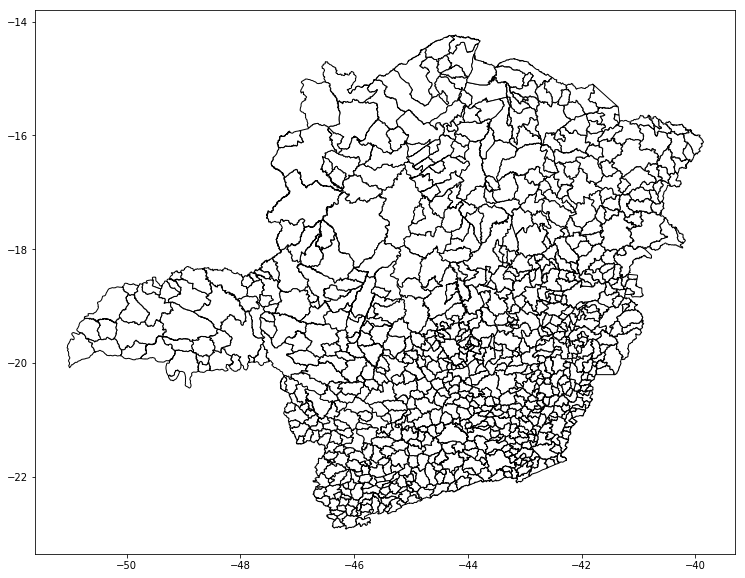

In [182]:
munic_mg.plot(color='white', edgecolor='black', figsize=(20, 10));

**V6:** Mostrar os municípios de Minas Gerais e os focos do mês de maio de 2016.

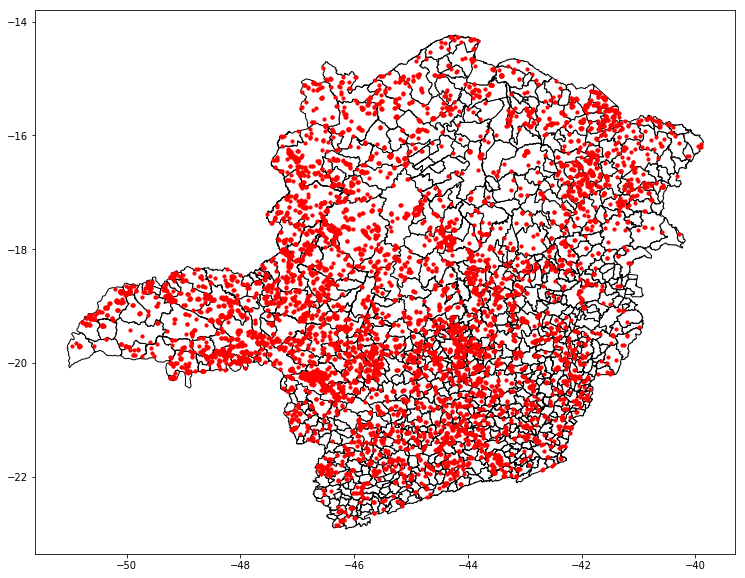

In [183]:
base = munic_mg.plot(color='white', edgecolor='black', figsize=(20, 10));

focos_mg = focos[focos.estado == "Minas Gerais"]

focos_mg.plot(ax=base, marker='o', color='red', markersize=10);

## Exercícios
<hr style="border:2px solid #0077b9;">


Gerar um mapa com a classificação dos municípios do Estado de Tocantins em relação ao número de focos ocorridos no mês de setembro de 2016.

## Referências Online
<hr style="border:2px solid #0077b9;">

Tutoriais:
* [learnPython Essentials of Python](http://www.stephaniehicks.com/learnPython).
* [IPython notebook reveal-based slideshows](http://www.slideviper.oquanta.info/tutorial/slideshow_tutorial_slides.html#/).
* [Make your slides with IPython](http://www.damian.oquanta.info/posts/make-your-slides-with-ipython.html).

Documentação da [matplotlib](https://matplotlib.org/):
* Opções de controle da legenda: [matplotlib.pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend).
* Opções de salvamento da imagem de um gráfico: [matplotlib.pyplot.savefig](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.savefig.html).
* Opções dos tipos de gráficos básicos:
  * [matplotlib.pyplot.pie](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib-pyplot-pie).
  
Documentação [seaborn](https://seaborn.pydata.org/):

